# Sentinel-2 Faro Metadata

Let's jump right into the data!

In [64]:
from sys import exit
import json
import os
import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data = []
for root, dirs, files in os.walk("DATA"):
    for file in files:
        if file == 'tileInfo.json':
            filename = os.path.join(root, file)
            with open(filename, 'r') as json_file:
                data.append(json.load(json_file))


data = pandas.DataFrame(data)
data.timestamp = pandas.to_datetime(data.timestamp)
data = data.sort_values('timestamp', ascending=True)
print(data.columns)

Index(['cloudyPixelPercentage', 'dataCoveragePercentage', 'datastrip',
       'gridSquare', 'latitudeBand', 'path', 'productName', 'productPath',
       'tileDataGeometry', 'tileGeometry', 'tileOrigin', 'timestamp',
       'utmZone'],
      dtype='object')


In [65]:
data.describe()

,cloudyPixelPercentage,dataCoveragePercentage,utmZone
count,180.000000,180.000000,180.0
mean,33.066333,52.680778,29.0
std,39.022558,46.509563,0.0
min,0.000000,4.950000,29.0
25%,0.000000,6.107500,29.0
50%,9.615000,48.340000,29.0
75%,63.385000,100.000000,29.0
max,100.000000,100.000000,29.0


Something looks odd from this 7 number summary.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112db2e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1130557b8>]], dtype=object)

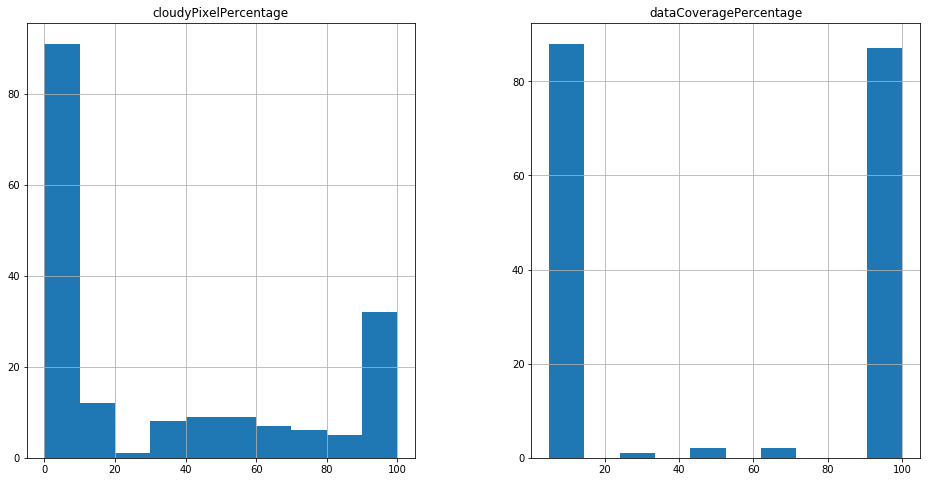

In [79]:
data.loc[:,['dataCoveragePercentage','cloudyPixelPercentage']].hist(figsize=(16,8))

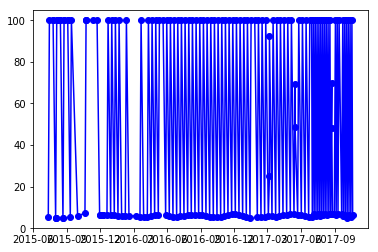

In [86]:
plt.plot(data['timestamp'],data['dataCoveragePercentage'],'b-o')

In [73]:
(data['dataCoveragePercentage']>=100).sum()

86

86 observations, from 2015 and 2017 have 100% data coverage. Let's use these only.

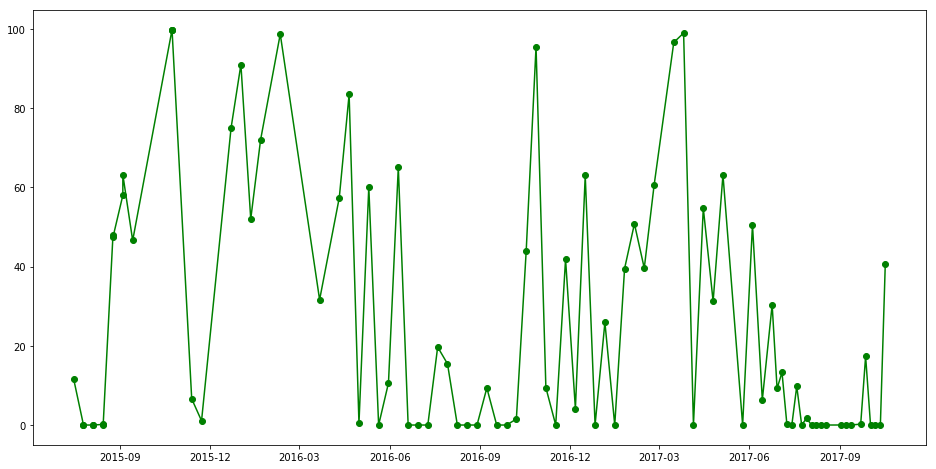

In [87]:
mask = data['dataCoveragePercentage']==100
data_100 = data.loc[mask,:]
plt.figure(figsize=(16,8))
plt.plot(data_100['timestamp'],data_100['cloudyPixelPercentage'],'g-o')